In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)#haciendo una muestra, definimos la semilla como un numero fijo
x = 3*np.random.rand(200)
y=20*x +2*np.random.randn(200)

x = x.reshape(200,1)
y = y.reshape(200,1)

print(x)
print(y)

[[1.12362036]
 [2.85214292]
 [2.19598183]
 [1.79597545]
 [0.46805592]
 [0.46798356]
 [0.17425084]
 [2.59852844]
 [1.80334504]
 [2.12421773]
 [0.06175348]
 [2.90972956]
 [2.49732792]
 [0.63701733]
 [0.5454749 ]
 [0.55021353]
 [0.91272673]
 [1.57426929]
 [1.29583506]
 [0.87368742]
 [1.83555868]
 [0.41848158]
 [0.87643395]
 [1.09908553]
 [1.36820995]
 [2.35552788]
 [0.59902135]
 [1.54270332]
 [1.77724371]
 [0.13935124]
 [1.82263456]
 [0.51157237]
 [0.19515478]
 [2.84665661]
 [2.8968961 ]
 [2.42519204]
 [0.91384131]
 [0.29301634]
 [2.05269908]
 [1.32045748]
 [0.3661147 ]
 [1.48553073]
 [0.10316556]
 [2.72796121]
 [0.77633994]
 [1.98756685]
 [0.93513323]
 [1.56020406]
 [1.64013084]
 [0.55456337]
 [2.90875388]
 [2.32539847]
 [2.81849682]
 [2.68448205]
 [1.79369994]
 [2.76562271]
 [0.26547751]
 [0.58794859]
 [0.13568187]
 [0.97599099]
 [1.16603187]
 [0.8140471 ]
 [2.48621253]
 [1.07025998]
 [0.84280353]
 [1.62808825]
 [0.42277267]
 [2.40659094]
 [0.22365193]
 [2.96066081]
 [2.31673431]
 [0.59

In [4]:
#graficando
#uniendo los vectores en uno solo
xy = np.hstack([x,y])
print(xy.shape)

(200, 2)


<function matplotlib.pyplot.show(close=None, block=None)>

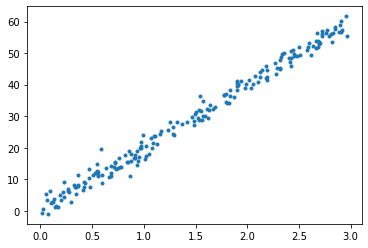

In [6]:
plt.plot(xy[:,0], xy[:,1],'.')
plt.show()
#conjunto de datos altamente relacionados

In [7]:
# La maldición de la dimensión: Esto dice que por cada variable que agrego en el conjunto de datos vamos a necesitar exponencialmente más muestras para poder tener la misma relevancia estadística.
# Cuál es el autovector relacionado con el autovalor más grande? Es el autovalor quien define cual es la dirección que contiene más información.

#PCA busca girar los ejes para que podamos representar la informacion con mayor variancia y asi mirar con q eje nos quedamos
#la intencion es buscar el eje q nos de mas informacion y darle ventajas coputacionales en computo a los datos

In [9]:
#centramos los datos
#restando la media de los datos
xy_centrado = xy - np.mean(xy,axis =0)

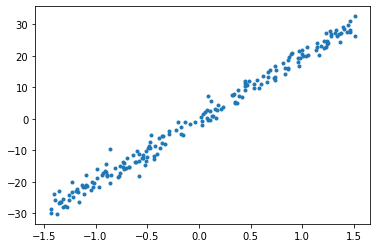

In [11]:
plt.plot(xy_centrado[:,0], xy_centrado[:,1],'.')
plt.show()#todos los numeros estan distribuidos al rededor del 0

In [12]:
#buscamos un valor d maximo de la trza de d.T*x.T*xd 
#tenemos que poner la restriccion de que d*d.T=1 para encontrar una solucion
#sacamos los autovalores y los autovectores
autovalores, autovectores = np.linalg.eig(xy_centrado.T.dot(xy_centrado))
print(autovectores)

[[-0.9987754  -0.04947417]
 [ 0.04947417 -0.9987754 ]]


In [13]:
#cada columna esta asociada a un autovalor, el vector asociado con el autovalor mas grande,
#nos dice la direccion de maxima varianza

In [18]:
#graficamos vectores
%run "..\\funciones_auxiliares\\graficarVectores.ipynb"

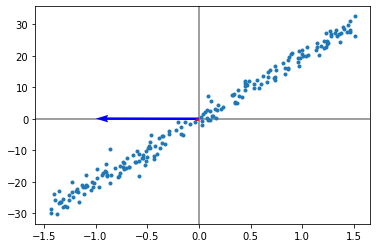

In [19]:
#queremos ver como estos autovectores estan relacionados con la direccion en la cual se mueve nuestra informacion
#trasponemos los autovectores pq queremos graficar cada columna
graficarVectores(autovectores.T,['blue', 'red'])
plt.plot(xy_centrado[:,0],xy_centrado[:,1],'.')
plt.show()


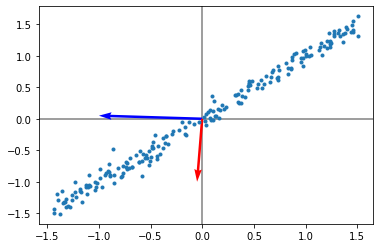

In [24]:
#un autovector se ve mmuy pequeño entonces vamos a ampliarlo, recordemos que realmente nos importa el autovector con
#el autovalor mas amplio entonces esto no altera el resultado
graficarVectores(autovectores.T,['blue', 'red'])
plt.plot(xy_centrado[:,0],xy_centrado[:,1]/20,'.')#dividimos el vector 2(Y) para q se vea el vector rojo
plt.show()

In [26]:
print(autovalores)# vemos que el segundo autovalor es el mas grande, es decir que el vector rojo 
#es el que contiene la mayor cantidad de informacion


[1.85050946e+00 6.28759594e+04]


In [28]:
#hagamos la transformacion de los datos
xy_nuevo = autovectores.T.dot(xy_centrado.T)

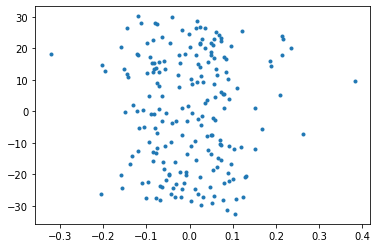

In [31]:
#graficarVectores(autovectores.T,['blue', 'red'])
plt.plot(xy_nuevo[0,:],xy_nuevo[1,:],'.')
plt.show()
#de esta forma se ve claramente que el eje Y tiene mas informacion que el eje x 